# Motivation

# Objectives

The aim and objectives of these study is;
* To reduce the rate of bad loads.
* To reduce load decision and processing
time-line (automate the process).
* To provide an objective process in arriving
at load decisions.
* To Increase customer retention.

# Analysis

The Analysis to be carried out are as follows
* To Develop an improve machine learning model classifer for  customers in Taiwan
* To develop a clostering model for customer segmentation.
* To create a  live Interactive Dashboard, and API and a web appliction for single and batch prediction and clustering.

In [13]:
# Modules importations

In [29]:
import numpy  as np
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
data = pd.read_csv('default_of_credit_card_clients.csv')

In [16]:
data.shape # Checking dataset shape to view number of observations and features in it.

(30000, 25)

In [17]:
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [18]:
data['default'] = data['default payment next month']  #Renaming the dependant variable name

In [19]:
data['default'].value_counts()

0    23364
1     6636
Name: default, dtype: int64

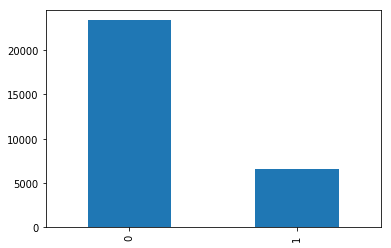

In [20]:
defa = data.default.value_counts().plot(kind='bar')

In [21]:
data.isna().sum() # Checking for the total nas for each columns

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
default                       0
dtype: int64

### From the above data we can see that there are no Nas in the Data Set.

In [22]:
data.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month', 'default'],
      dtype='object')

In [23]:
# Categorical Independent variables

In [41]:
data = data.drop('default payment next month',axis=1)

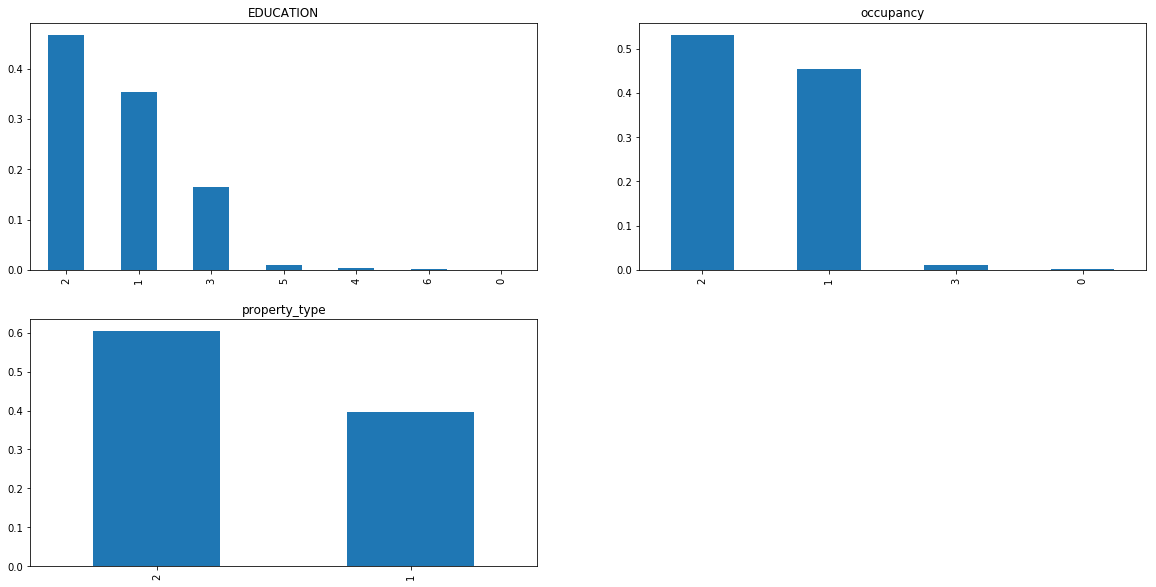

In [30]:
plt.figure(1)
plt.subplot(221)
data['EDUCATION'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'EDUCATION') 

plt.subplot(222)
data['MARRIAGE'].value_counts(normalize=True).plot.bar(title= 'occupancy') 

plt.subplot(223) 
data['SEX'].value_counts(normalize=True).plot.bar(title= 'SEX') 
plt.show()

In [33]:
import seaborn as sns

### Categorical Independent Variable vs Target Variable

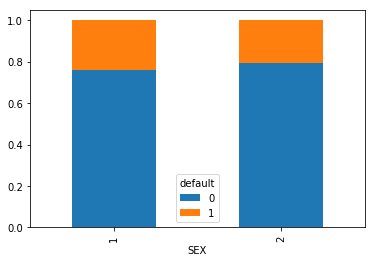

In [37]:
occupancy=pd.crosstab(data['SEX'],data['default'])
occupancy.div(occupancy.sum(1).astype(float),
              axis=0).plot(kind="bar", stacked=True, figsize=(6,4))

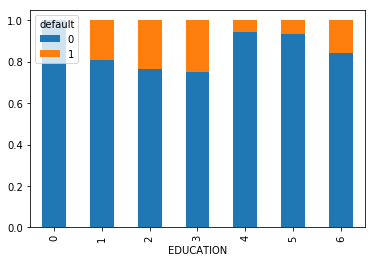

In [43]:
occupancy=pd.crosstab(data['EDUCATION'],data['default'])
occupancy.div(occupancy.sum(1).astype(float),
              axis=0).plot(kind="bar", stacked=True, figsize=(6,4))

From the bar plot above, we can see that the percentage of defaulters for 
for all education levels is very high as compare to the that of non defaulters 
for the loan applicants.

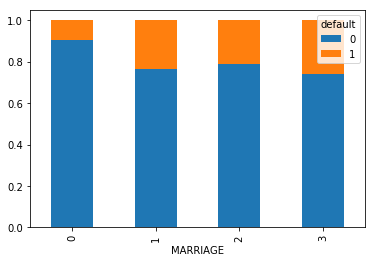

In [42]:
occupancy=pd.crosstab(data['MARRIAGE'],data['default'])
occupancy.div(occupancy.sum(1).astype(float),
              axis=0).plot(kind="bar", stacked=True, figsize=(6,4))

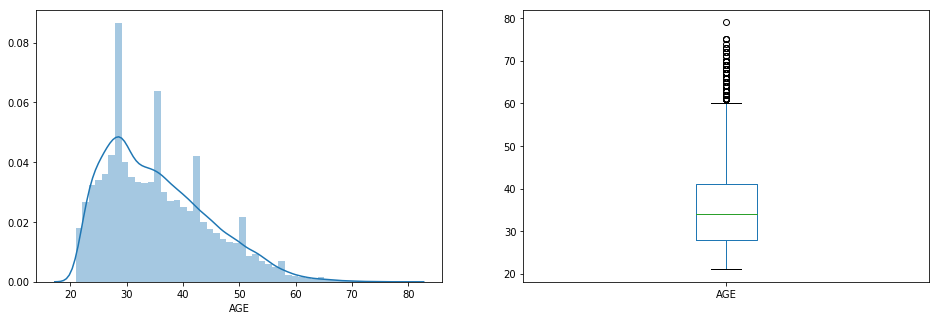

In [34]:
plt.figure(1) 
plt.subplot(121)
sns.distplot(data['AGE']); 
plt.subplot(122)
data['AGE'].plot.box(figsize=(16,5)) 
plt.show()

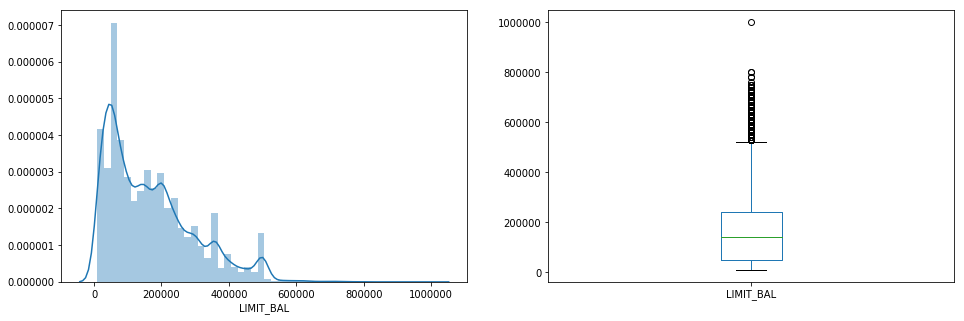

In [35]:
plt.figure(1) 
plt.subplot(121)
sns.distplot(data['LIMIT_BAL']); 
plt.subplot(122)
data['LIMIT_BAL'].plot.box(figsize=(16,5)) 
plt.show()